In [10]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [11]:
NR14_t0 = datetime.datetime(2022, 5, 9,16,56,24)
NR15_t0 = datetime.datetime(2022,10,13, 9,11,50)
print(NR14_t0,NR15_t0)

2022-05-09 16:56:24 2022-10-13 09:11:50


In [12]:
series_plc_NR15 = nf.create_date_range("221013", 8, fmt="%y%m%d")
offset_plc_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR15   = nf.read_plclog_data(series_plc_NR15, offset_plc_NR15)
data_plc_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


Index(['date', 'heures', 'Comments', 'Pumping turbo speed', 'P1 mbar',
       'K3 mbar', 'K4 mbar', 'flow l/mn', 'FLOW µm/s', 'K5 mbar', 'K6 mbar',
       'PT100 bidon °C', 'P/T %', 'K8 mbar', 'K10 mbar', 'P2 mbar', 'P3 mbar',
       'BM - MC K', 'LAST RUN K', 'RuO2 MC', 'RuO2 CP', 'Still Stage', 'FR MC',
       '2nd Stage', '1srt Stage', 'dffsf', 'Still bottom', 'MC bottom',
       'R MMR1 1', 'R MMR1 2', 'R MMR1 3', 'R MMR2 1', 'R MMR2 2', 'R MMR2 3',
       'R MMR3 1', 'R MMR3 2', 'R MMR3 3', 'MGC3_OK', 'MC_Heater',
       'MC_heater-set', 'MC_power', 'Still_heater', 'Still_heater_set',
       'Still_power', 'Other_heater', 'Other_heater_set', 'Other_power', 'VE1',
       'VE2', 'VE3', 'VE4', 'VE5', 'VE6', 'VE7', 'VE8', 'VE9', 'VE10', 'VE11',
       'VE12', 'VE13', 'VE14', 'VE15', 'VE16', 'VE17', 'VE18', 'VE19', 'VE20',
       'VE21', 'VE22', 'VE23', 'VE24', 'VE25', 'VE26', 'VE27', 'VE28', 'VE29',
       'VE30', 'VE31', 'VE32', 'VE33', 'VE34', 'VE35', 'VE36', 'VE37', 'VE38',
       

In [13]:
series_mmr_NR15 = nf.create_date_range("2022-10-13", 8)
offset_mmr_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR15   = nf.read_MACRT_data(series_mmr_NR15, offset_mmr_NR15)
data_mmr_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


Index(['Date', 'Time', 'free_Meas', 'free_Conv', 'COLD PLATE_Meas',
       'COLD PLATE_Conv', 'STILL_Meas', 'STILL_Conv', 'MIXING CHAMB_Meas',
       'MIXING CHAMB_Conv', '2ND STAGE_Meas', '2ND STAGE_Conv',
       '1ST STAGE_Meas', '1ST STAGE_Conv', 'MGC3-109_1_Meas',
       'MGC3-109_1_Conv', 'MGC3-109_2_Meas', 'MGC3-109_2_Conv',
       'MGC3-109_3_Meas', 'MGC3-109_3_Conv', 'ctime'],
      dtype='object')

In [14]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [16]:
NR15_time_mmr = (data_mmr_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR15_time_plc = (data_plc_NR15['ctime']-NR15_t0).apply(pd_td_to_days)

In [26]:
data_mmr_NR15['MGC3-109_1_Conv']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
609   NaN
610   NaN
611   NaN
612   NaN
613   NaN
Name: MGC3-109_1_Conv, Length: 10693, dtype: float64

## Make the temperature plot

<IPython.core.display.Javascript object>


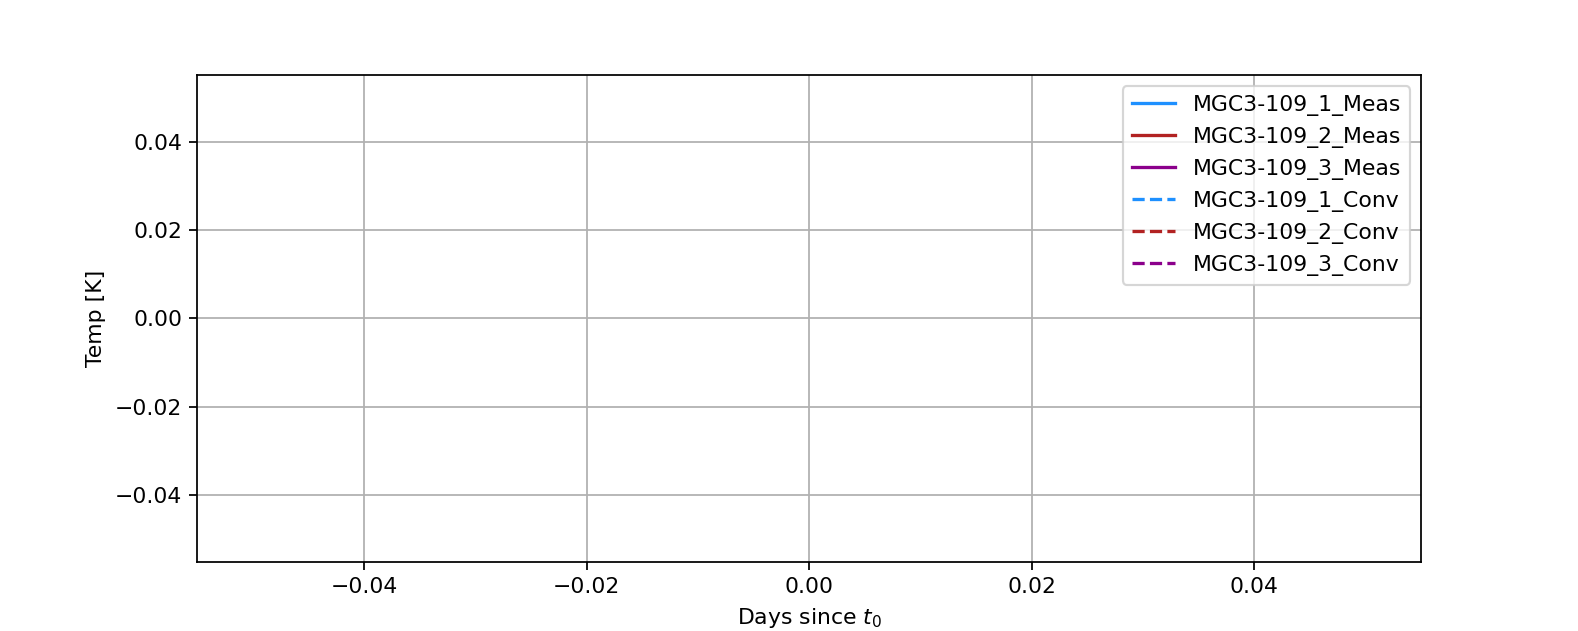

In [19]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')

ls_NR14 = "--"
ls_NR15 = "-"

c_1 = 'dodgerblue'
c_2 = 'firebrick'
c_3 = 'darkmagenta'

## Plot the MACRT data for Run 15
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_1_Meas'], label='MGC3-109_1_Meas', color=c_1, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_2_Meas'], label='MGC3-109_2_Meas', color=c_2, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_3_Meas'], label='MGC3-109_3_Meas', color=c_3, ls=ls_NR15)

## Plot the MACRT data for Run 15
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_1_Conv'], label='MGC3-109_1_Conv', color=c_1, ls=ls_NR14)
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_2_Conv'], label='MGC3-109_2_Conv', color=c_2, ls=ls_NR14)
a.plot(NR15_time_mmr, data_mmr_NR15['MGC3-109_3_Conv'], label='MGC3-109_3_Conv', color=c_3, ls=ls_NR14)

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


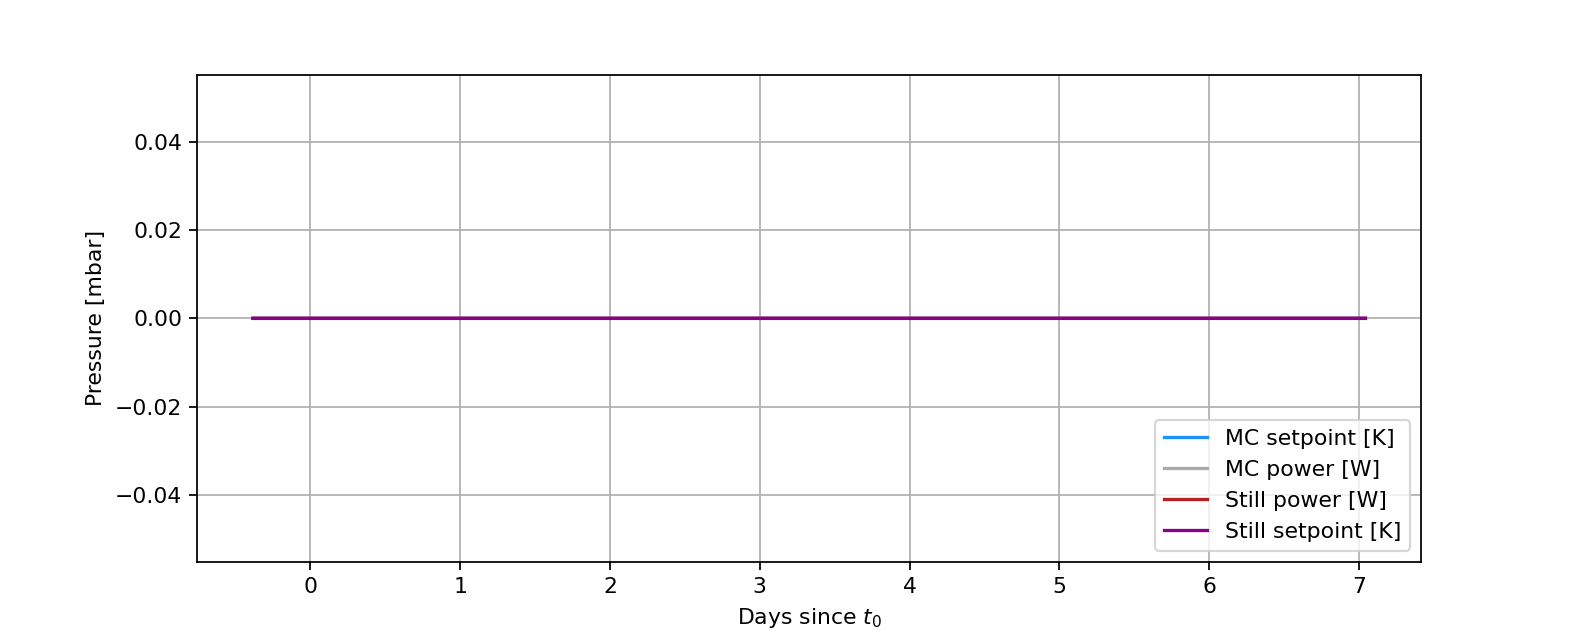

In [20]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

ls_NR15 = "-"

c_1 = 'dodgerblue'
c_2 = 'darkgrey'
c_3 = 'firebrick'
c_4 = 'darkmagenta'

# ## Plot the MACRT data for Run 15
a.plot(NR15_time_plc, data_plc_NR15['MC_heater-set'], label='MC setpoint [K]', color=c_1, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['MC_power'], label='MC power [W]', color=c_2, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['Still_heater'], label='Still power [W]', color=c_3, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['Still_heater_set'], label='Still setpoint [K]', color=c_4, ls=ls_NR15)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)